In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
np.random.seed(11)

In [3]:
def oracle(x):
    return np.sinc(3*x)

In [4]:
n = 500
sigma = 0.01

In [5]:
x = np.random.rand(n)
y = oracle(x) + sigma * np.random.rand(n)

In [6]:
no = 1000
xo = np.linspace(0,1,no)
yo = oracle(xo)

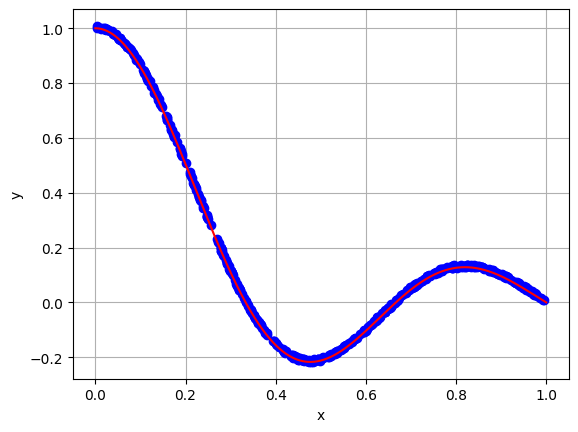

In [7]:
fig, ax = plt.subplots()
ax.plot(x,y,'bo')
ax.plot(xo,yo,'r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()
plt.show()

In [8]:
X = np.reshape(x,(-1,1))
y = np.reshape(y, (-1,1))

In [9]:
X.shape, y.shape

((500, 1), (500, 1))

In [10]:
lam = 1
w = np.linalg.solve(
    np.matmul(X.T, X) + lam * np.eye(1),
    np.matmul(X.T,y)
)
w_primal = w

In [ ]:
lam = 1 
alpha = np.linalg.solve(
    np.matmul(X,X.T) + lam * np.eye(n),
    y
)
w = np.matmul(X.T,alpha)
w_dual = w

In [12]:
sum(abs(w_primal - w_dual))

array([2.35922393e-16])

In [25]:
y_pred = xo * w_primal
y_pred.T.shape

(1000, 1)

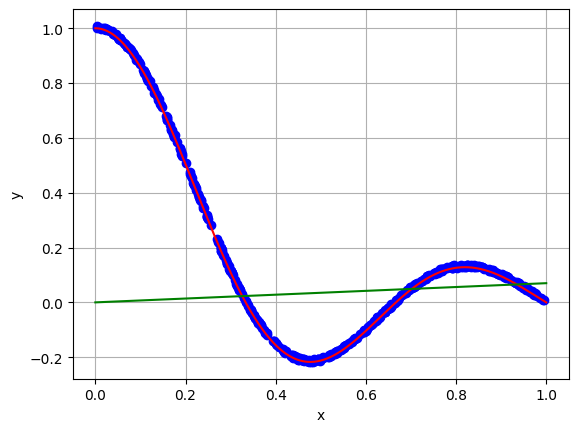

In [27]:
fig, ax = plt.subplots()
ax.plot(x,y,'bo')
ax.plot(xo,yo,'r')
ax.plot(xo, y_pred.T, 'g')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid()
plt.show()